In [145]:
import numpy as np
import warnings
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import KFold


In [156]:
# Part A. 1) Explore dataset

with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     # X, y = datasets.load_boston(return_X_y=True)
     bostonData = datasets.load_boston()
X = bostonData.data
y = bostonData.target
print(X.shape, ", ", y.shape)
print(bostonData.feature_names)

(506, 13) ,  (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [157]:
# not part of the assignment, just looking into dataset for personal clarification
import pandas as pd
pandasDat = pd.DataFrame(data=bostonData.data,columns=bostonData.feature_names)
pandasDat.info()
pandasDat.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [158]:
# not part of the assignment, just for personal exploration
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
def myFunc(X,y):
    reg =linear_model.LinearRegression()
    reg.fit(X,y)
    print("Coeffs: ",reg.coef_)
    print("Intercept: ",reg.intercept_)
    # k-fold cross validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(reg, X, y, scoring="neg_mean_squared_error", cv=kf)
    scores = -scores
    print("MSE k-fold: ",np.mean(scores))

def skyRig(X,y):
    reg2 = Ridge(alpha=1,solver="cholesky")
    reg2.fit(X,y)
    print("\nCoeffs: ",reg2.coef_)
    print("Intercept: ",reg2.intercept_)
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(reg2, X, y, scoring="neg_mean_squared_error", cv=kf)
    scores = -scores
    print("MSE k-fold: ",np.mean(scores))
myFunc(X,y)
skyRig(X,y)



Coeffs:  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Intercept:  36.459488385089784
MSE k-fold:  23.36420300753096

Coeffs:  [-1.04595278e-01  4.74432243e-02 -8.80467889e-03  2.55239322e+00
 -1.07770146e+01  3.85400020e+00 -5.41453810e-03 -1.37265353e+00
  2.90141589e-01 -1.29116463e-02 -8.76074394e-01  9.67327945e-03
 -5.33343225e-01]
Intercept:  31.59766981827424
MSE k-fold:  23.55453050994864


In [159]:
#Part A, Problem 3.

def fitCFlinearModel(X, y):
    # add 1s to each instance of X
    X = np.c_[np.ones((X.shape[0],1)),X]
    xTransP= X.T
    thetaHat = np.linalg.inv(xTransP.dot(X)).dot(xTransP).dot(y)
    # print('intercept:', thetaHat[0], '\ncoef:', thetaHat[1:])
    return thetaHat

def kFoldCrossCFModel(X,y,k):
    totalTrainError = 0
    totalTestError = 0
    kFoldSet = KFold(n_splits=k, random_state=42,shuffle=True)
    totN = 0
    for i, (trainIndx, testIndx) in enumerate(kFoldSet.split(X)):
        totN = i
        xTrainSet, xTestSet = X[trainIndx],X[testIndx]
        yTrainSet, yTestSet = y[trainIndx],y[testIndx]
        thetaHat = fitCFlinearModel(xTrainSet,yTrainSet)
        xTrainSet = np.c_[np.ones((xTrainSet.shape[0],1)),xTrainSet]
        xTestSet = np.c_[np.ones((xTestSet.shape[0],1)),xTestSet]
        totalTestError+=np.mean((xTestSet.dot(thetaHat)-yTestSet)**2)
        totalTrainError +=np.mean((xTrainSet.dot(thetaHat)-yTrainSet)**2)
    totN+=1
    print("Average Train Error: ",totalTrainError/totN,"Average Test Error:", totalTestError/totN)
    return

kFoldCrossCFModel(X,y,10)


Average Train Error:  21.818586996144017 Average Test Error: 23.364203007530875


In [153]:
#Part A, Problem 4.

def fitCFridgeModel(X, y, alphC):
    #identity matrix
    X = np.c_[np.ones((X.shape[0],1)),X]
    matI = alphC* np.identity(X.shape[1])
    # top-left cell has to be 0
    matI[0,0] = 0
    # add 1s to each instance of X
    xTransP= X.T
    thetaHat = np.linalg.inv(xTransP.dot(X)+matI).dot(xTransP).dot(y)
    # print('intercept:', thetaHat[0], '\ncoef:', thetaHat[1:])
    return thetaHat
# fitCFridgeModel(X,y,10**4.5)

def kFoldToFindAlpha(X,y,k, alphVals):
    kFoldSet = KFold(n_splits=k, random_state=21,shuffle=True)
    alphScores = []
    for alphV in alphVals:
        totN = 0
        totalTestError = 0
        for i, (trainIndx, testIndx) in enumerate(kFoldSet.split(X)):
            totN = i
            xTestSet = X[testIndx]
            yTestSet = y[testIndx]
            thetaHat = fitCFridgeModel(X,y,alphV)
            # xTrainSet = np.c_[np.ones((xTrainSet.shape[0],1)),xTrainSet]
            xTestSet = np.c_[np.ones((xTestSet.shape[0],1)),xTestSet]
            totalTestError+=np.mean((xTestSet.dot(thetaHat)-yTestSet)**2)
            # totalTrainError +=np.mean((xTrainSet.dot(thetaHat)-yTrainSet)**2)
        totN+=1
        alphScores.append(totalTestError/totN)
        print("MSE: ",totalTestError/totN,"  For_alpha: ", alphV)
    return alphScores

def findBestAlpha(X,y):
    alphVals = np.logspace(1, 7, num=13)
    alphScores = kFoldToFindAlpha(X,y,13,alphVals)
    print("Best alpha:", alphVals[np.argmin(alphScores)])

findBestAlpha(X,y)


MSE:  22.700216274836222   For_alpha:  10.0
MSE:  23.056152810401233   For_alpha:  31.622776601683793
MSE:  23.85382570253046   For_alpha:  100.0
MSE:  25.443430226203006   For_alpha:  316.22776601683796
MSE:  27.71075746916593   For_alpha:  1000.0
MSE:  31.074475012504404   For_alpha:  3162.2776601683795
MSE:  36.77331199977495   For_alpha:  10000.0
MSE:  45.583232070101616   For_alpha:  31622.776601683792
MSE:  53.60183081673229   For_alpha:  100000.0
MSE:  58.37501252402445   For_alpha:  316227.7660168379
MSE:  61.33240601013918   For_alpha:  1000000.0
MSE:  63.580427513656204   For_alpha:  3162277.6601683795
MSE:  66.95135531770133   For_alpha:  10000000.0
Best alpha: 10.0


In [154]:
#Part A, Problem 5.
def kFoldRidgeModel(X,y,k):
    totalTrainError = 0
    totalTestError = 0
    kFoldSet = KFold(n_splits=k, random_state=21,shuffle=True)
    totN = 0
    for i, (trainIndx, testIndx) in enumerate(kFoldSet.split(X)):
        totN = i
        xTrainSet, xTestSet = X[trainIndx],X[testIndx]
        yTrainSet, yTestSet = y[trainIndx],y[testIndx]
        thetaHat = fitCFridgeModel(xTrainSet,yTrainSet,10.0)
        xTrainSet = np.c_[np.ones((xTrainSet.shape[0],1)),xTrainSet]
        xTestSet = np.c_[np.ones((xTestSet.shape[0],1)),xTestSet]
        totalTestError+=np.mean((xTestSet.dot(thetaHat)-yTestSet)**2)
        totalTrainError +=np.mean((xTrainSet.dot(thetaHat)-yTrainSet)**2)
    totN+=1
    print("Average Train Error: ",totalTrainError/totN,"Average Test Error:", totalTestError/totN)
    return

kFoldCrossCFModel(X,y,13)

Average Train Error:  21.82404544006389 Average Test Error: 23.72746392101283


In [317]:
#Part A, Problem 6.

from sklearn.preprocessing import PolynomialFeatures

polyFeature = PolynomialFeatures(degree=2,include_bias=False)
Xpoly = polyFeature.fit_transform(X)
# reg3 =linear_model.LinearRegression()
# reg3.fit(Xpoly,y)
# print("Intercept: ",reg3.intercept_)
# # k-fold cross validation
# kf = KFold(n_splits=10, shuffle=True, random_state=42)
# scores = cross_val_score(reg3, Xpoly, y, scoring="neg_mean_squared_error", cv=kf)
# scores = -scores
# print("MSE k-fold: ",np.mean(scores))
def findBestAlphaPoly(X,y):
    alphVals = np.logspace(1, 7, num=13)
    alphScores = kFoldToFindAlpha(X,y,13,alphVals)
    print("Best alpha:", alphVals[np.argmin(alphScores)])

findBestAlphaPoly(Xpoly,y)
print("For ridge regularization:")
kFoldRidgeModel(Xpoly,y,10)

MSE:  6.966371168834461   For_alpha:  10.0
MSE:  7.3735135707386785   For_alpha:  31.622776601683793
MSE:  7.836041314040468   For_alpha:  100.0
MSE:  8.273495853571307   For_alpha:  316.22776601683796
MSE:  8.75750014448405   For_alpha:  1000.0
MSE:  9.325559031775638   For_alpha:  3162.2776601683795
MSE:  9.871304474189571   For_alpha:  10000.0
MSE:  10.418537782721447   For_alpha:  31622.776601683792
MSE:  11.07789797003013   For_alpha:  100000.0
MSE:  11.797387579956895   For_alpha:  316227.7660168379
MSE:  12.928607831107332   For_alpha:  1000000.0
MSE:  15.287395845859534   For_alpha:  3162277.6601683795
MSE:  18.94356151417945   For_alpha:  10000000.0
Best alpha: 10.0
For ridge regularization:
Average Train Error:  6.791307484102328 Average Test Error: 13.046159800052237


In [319]:
#Part A, Problem 7 (GD for lienar regression without regularization).
# from sklearn.preprocessing import StandardScaler
def gradientDescent(X,y):
    etaVal = 0.000001
    gdIters = 100000
    # add ones
    X = np.c_[np.ones((X.shape[0],1)),X]
    m = X.shape[0]
    # random initialization for theta
    thetaHat = np.random.randn(X.shape[1])
    thetaHat = thetaHat.reshape(X.shape[1],1)
    # reshape y for matrix multiplication
    y = np.reshape(y,(len(y),1))

    for indx in range(gdIters):
        gradientVal = (2/m) * X.T.dot(X.dot(thetaHat)-y)
        # print(gradientVal)
        thetaHat = thetaHat - etaVal*gradientVal
    return thetaHat

def kFoldCrossGradDesc(X,y,k):
    totalTrainError = 0
    totalTestError = 0
    kFoldSet = KFold(n_splits=k, random_state=42,shuffle=True)
    totN = 0
    for i, (trainIndx, testIndx) in enumerate(kFoldSet.split(X)):
        totN = i
        xTrainSet, xTestSet = X[trainIndx],X[testIndx]
        yTrainSet, yTestSet = y[trainIndx],y[testIndx]
        thetaHat = gradientDescent(xTrainSet,yTrainSet)
        xTrainSet = np.c_[np.ones((xTrainSet.shape[0],1)),xTrainSet]
        xTestSet = np.c_[np.ones((xTestSet.shape[0],1)),xTestSet]
        totalTestError+=np.mean((xTestSet.dot(thetaHat)-yTestSet)**2)
        totalTrainError +=np.mean((xTrainSet.dot(thetaHat)-yTrainSet)**2)
    totN+=1
    print("Average Train Error: ",totalTrainError/totN,"Average Test Error:", totalTestError/totN)
    return

kFoldCrossGradDesc(X,y,10)
print(gradientDescent(X,y))


Average Train Error:  136.13026382397203 Average Test Error: 135.09555257881127
[[-1.25327860e+00]
 [-8.05097864e-02]
 [ 6.62710179e-02]
 [-8.16158460e-02]
 [-2.55148202e+00]
 [ 1.56698645e+00]
 [ 1.21939060e+00]
 [ 1.25383284e-01]
 [ 7.02121974e-01]
 [ 8.95978758e-02]
 [ 4.00843198e-05]
 [ 2.03281459e-01]
 [ 2.66761112e-02]
 [-7.76619012e-01]]


In [173]:
#Part A, Problem 7 (GD for lienar regression with regularization).
def gradientDescentRidge(X,y, alphaC,gdIters = 5000):
    etaVal = 0.0000001
    m = X.shape[0]
    # add ones
    X = np.c_[np.ones((X.shape[0],1)),X]
    # random initialization for theta
    thetaHat = np.zeros(X.shape[1])
    thetaHat = thetaHat.reshape(X.shape[1],1)
    # reshape y for matrix multiplication
    y = np.reshape(y,(len(y),1))

    for indx in range(gdIters):
        gradientVal = (2/m) * X.T.dot(X.dot(thetaHat)-y)+alphaC*thetaHat
        # print(gradientVal)
        thetaHat = thetaHat - etaVal*gradientVal
    return thetaHat

def findBestAlphaForGDRidge(X,y,k, alphVals):
    kFoldSet = KFold(n_splits=k, random_state=21,shuffle=True)
    alphScores = []
    for alphV in alphVals:
        totN = 0
        totalTestError = 0
        for i, (trainIndx, testIndx) in enumerate(kFoldSet.split(X)):
            totN = i
            xTestSet = X[testIndx]
            yTestSet = y[testIndx]
            thetaHat = gradientDescentRidge(X,y,alphV)
            xTestSet = np.c_[np.ones((xTestSet.shape[0],1)),xTestSet]
            totalTestError+=np.mean((xTestSet.dot(thetaHat)-yTestSet)**2)
        totN+=1
        alphScores.append(totalTestError/totN)
        print("MSE: ",totalTestError/totN,"  For_alpha: ", alphV)
    return alphScores

def findBestAlphaGD(X,y):
    alphVals = np.logspace(1, 7, num=13)
    alphScores = findBestAlphaForGDRidge(X,y,13,alphVals)
    print("Best alpha:", alphVals[np.argmin(alphScores)])

findBestAlphaGD(X,y)

MSE:  116.71120645942794   For_alpha:  10.0
MSE:  116.67828497522747   For_alpha:  31.622776601683793
MSE:  116.57505178230339   For_alpha:  100.0
MSE:  116.25691902813391   For_alpha:  316.22776601683796
MSE:  115.32286449177224   For_alpha:  1000.0
MSE:  112.86549385696459   For_alpha:  3162.2776601683795
MSE:  107.67949962869255   For_alpha:  10000.0
MSE:  102.50474267545597   For_alpha:  31622.776601683792
MSE:  111.87992919641579   For_alpha:  100000.0
MSE:  164.65539960813547   For_alpha:  316227.7660168379
MSE:  296.71619070872936   For_alpha:  1000000.0
MSE:  449.19123963325796   For_alpha:  3162277.6601683795
MSE:  538.5344568128824   For_alpha:  10000000.0
Best alpha: 31622.776601683792


In [171]:
# print train and test mse for the best alpha 

def kFoldGradDesRidge(X,y,k):
    totalTrainError = 0
    totalTestError = 0
    kFoldSet = KFold(n_splits=k, random_state=21,shuffle=True)
    totN = 0
    for i, (trainIndx, testIndx) in enumerate(kFoldSet.split(X)):
        totN = i
        xTrainSet, xTestSet = X[trainIndx],X[testIndx]
        yTrainSet, yTestSet = y[trainIndx],y[testIndx]
        thetaHat = gradientDescentRidge(xTrainSet,yTrainSet,10.0**4.5,20000) # inserting the best alpha value
        xTrainSet = np.c_[np.ones((xTrainSet.shape[0],1)),xTrainSet]
        xTestSet = np.c_[np.ones((xTestSet.shape[0],1)),xTestSet]
        totalTestError+=np.mean((xTestSet.dot(thetaHat)-yTestSet)**2)
        totalTrainError +=np.mean((xTrainSet.dot(thetaHat)-yTrainSet)**2)
    totN+=1
    print("Average Train Error: ",totalTrainError/totN,"Average Test Error:", totalTestError/totN)
    return

kFoldGradDesRidge(X,y,10)

Average Train Error:  102.47029235957253 Average Test Error: 103.5526319757809


In [310]:
#Part A, Problem 8
# from sklearn.linear_model import Lasso

# def scikitLasso(X,y):
#     lasso = Lasso()
#     lasso.fit(X,y)
#     print(lasso.coef_, lasso.intercept_)
#     kf = KFold(n_splits=10, shuffle=True, random_state=21)
#     scores = cross_val_score(lasso, X, y, scoring="neg_mean_squared_error", cv=kf)
#     scores = -scores
#     print("MSE k-fold: ",np.mean(scores))
#     return

# scikitLasso(X,y)

def gradientDescentLasso(X,y,eta=0.0000001,alphA=0.1,itrs=5000):
    m = X.shape[1]
    # normalize X
    X = X / (np.linalg.norm(X,axis = 0))
    # random initialization for theta
    thetaHat = np.zeros(X.shape[1])
    biasVal = 0


    for indx in range(itrs):
        yP = X.dot(thetaHat)+biasVal
        grad = np.zeros(X.shape[1])
        # for each column
        for j in range(m):
            if thetaHat[j]>0:
                grad[j]=(-(2*(X[:,j]).dot(y-yP))+alphA)/m
            else:
                grad[j]=(-(2*(X[:,j]).dot(y-yP))-alphA)/m
        gradb = -2*np.sum(y-yP)/m
        thetaHat-= eta*grad
        biasVal -=eta*gradb
    # return thetaHat.reshape(m,)
    return np.insert(thetaHat.reshape(m,),0,biasVal)

print(gradientDescentLasso(X,y))


def kFoldLasso(X,y,k):
    totalTrainError = 0
    totalTestError = 0
    kFoldSet = KFold(n_splits=k, random_state=21,shuffle=True)
    totN = 0
    for i, (trainIndx, testIndx) in enumerate(kFoldSet.split(X)):
        totN = i
        xTrainSet, xTestSet = X[trainIndx],X[testIndx]
        yTrainSet, yTestSet = y[trainIndx],y[testIndx]
        thetaHat = gradientDescentLasso(xTrainSet,yTrainSet) 
        xTrainSet = np.c_[np.ones((xTrainSet.shape[0],1)),xTrainSet]
        xTestSet = np.c_[np.ones((xTestSet.shape[0],1)),xTestSet]
        totalTestError+=np.mean((xTestSet.dot(thetaHat)-yTestSet)**2)
        totalTrainError +=np.mean((xTrainSet.dot(thetaHat)-yTrainSet)**2)
    totN+=1
    print("Average Train Error: ",totalTrainError/totN,"Average Test Error:", totalTestError/totN)
    return

kFoldLasso(X,y,10)

[0.85992293 0.00912302 0.02190471 0.02852203 0.0127381  0.03602996
 0.03921532 0.03309172 0.03535804 0.02417036 0.03249589 0.03702483
 0.03834623 0.02753579]
Average Train Error:  213.62264695269172 Average Test Error: 214.4137198133098


In [309]:
#Part A, Problem 9
# from sklearn.linear_model import ElasticNet

# def scikitElastic(X,y):
#     elas = ElasticNet()
#     elas.fit(X,y)
#     print(elas.coef_, elas.intercept_)
#     kf = KFold(n_splits=10, shuffle=True, random_state=21)
#     scores = cross_val_score(elas, X, y, scoring="neg_mean_squared_error", cv=kf)
#     scores = -scores
#     print("MSE k-fold: ",np.mean(scores))
#     return

# scikitElastic(X,y)

def gradientDescentElastic(X,y,alphA=0.01,rho=0.01,eta=0.0000001,itrs=5000):
    # add ones
    m = X.shape[1]
    # normalize X
    X = X / (np.linalg.norm(X,axis = 0))
    # initialization for theta
    thetaHat = np.zeros(X.shape[1])
    biasVal = 0
    for indx in range(itrs):
        yP = X.dot(thetaHat)+biasVal
        grad = np.zeros(X.shape[1])
        #for each column
        for j in range(m):
            if thetaHat[j]>0:
                grad[j]=(-(2*(X[:,j]).dot(y-yP))+alphA+2*rho*thetaHat[j])/m
            else:
                grad[j]=(-(2*(X[:,j]).dot(y-yP))-alphA+2*rho*thetaHat[j])/m
        gradb = -2*np.sum(y-yP)/m
        thetaHat-= eta*grad
        biasVal -=eta*gradb
    # return thetaHat.reshape(m,)
    return np.insert(thetaHat.reshape(m,),0,biasVal)


print(gradientDescentElastic(X,y))

def kFoldElastic(X,y,k):
    totalTrainError = 0
    totalTestError = 0
    kFoldSet = KFold(n_splits=k, random_state=21,shuffle=True)
    totN = 0
    for i, (trainIndx, testIndx) in enumerate(kFoldSet.split(X)):
        totN = i
        xTrainSet, xTestSet = X[trainIndx],X[testIndx]
        yTrainSet, yTestSet = y[trainIndx],y[testIndx]
        thetaHat = gradientDescentElastic(xTrainSet,yTrainSet) 
        xTrainSet = np.c_[np.ones((xTrainSet.shape[0],1)),xTrainSet]
        xTestSet = np.c_[np.ones((xTestSet.shape[0],1)),xTestSet]
        totalTestError+=np.mean((xTestSet.dot(thetaHat)-yTestSet)**2)
        totalTrainError +=np.mean((xTrainSet.dot(thetaHat)-yTrainSet)**2)
    totN+=1
    print("Average Train Error: ",totalTrainError/totN,"Average Test Error:", totalTestError/totN)
    return

kFoldElastic(X,y,10)



[0.8599229  0.00912648 0.02190816 0.02852548 0.01274156 0.0360334
 0.03921877 0.03309517 0.03536149 0.02417381 0.03249934 0.03702828
 0.03834967 0.02753923]
Average Train Error:  213.68462696674206 Average Test Error: 214.47572281355073


In [320]:
#Part A, Problem 10
'''
for all the models you've created so far, which one performed best and why did it perform best. What made it perform better than the others. What were it's parameters. Why would you choose it over the others.
'''
# I'd choose 
print("For the purpose of this exercise, I'd choose linear regression with closed form solution as it has the least MSE value during the k-fold cross validation for the test data. Also it may seem that polynomial model produces the least MSE, the difference between train MSE and test MSE is the highest. So, I'd choose linear regression using the closed form solution for this dataset.")

print("Its parameters are:\n")
theta = fitCFlinearModel(X,y)
print("Coefficients:\n",theta[1:],"\n\nIntercept: ",theta[0])



For the purpose of this exercise, I'd choose linear regression with closed form solution as it has the least MSE value during the k-fold cross validation for the test data. Also it may seem that polynomial model produces the least MSE, the difference between train MSE and test MSE is the highest. So, I'd choose linear regression using the closed form solution for this dataset.
Its parameters are:

Coefficients:
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01] 

Intercept:  36.459488385086175


## Problem 11
a) For linear regression model using the closed form solution, the parameters are calucated using the solution of minimizing the cost function. For ridge regression model using the closed solution, the parameters are again calculated using the solution of minimizing the cost function, which also contains the regularizing term. Though regularization is used to prevent overfitting, it can be used even in our simple linear model. K-fold cross-validation is used to determine the best lamda for the ridge regression. Similarly, gradient descent approach is also implemented to explore the possibility. Even though it does not give better results than closed form solution, gradient descent is very popular in estimating regressions to minimize cost functions which do not have closed form solution. This is demonstrated when gradient descent is used to implement lasso regression and elastic net.
b) To run the program, make sure appropriate libraries are available: Scikit-learn, numpy, matplotlib (for part 2). Then execute the codes cell by cell in order.

In [129]:
#PART B, Q1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

cancerData = datasets.load_breast_cancer()
X2 = cancerData.data
y2 = cancerData.target
print(X2.shape, ", ", y2.shape)
print(cancerData.feature_names)
print("Target: ",cancerData.target_names)

# split into train and test
trainX2Data, testX2data, trainy2Data, testy2Data = train_test_split(X2,y2,test_size=0.20,random_state=18)
print(len(trainX2Data),len(testX2data))
print(len(trainy2Data),len(testy2Data))

# scale the data for gradient ascent
scaler = StandardScaler().fit(trainX2Data)
X2trainTransformed = scaler.transform(trainX2Data)
X2testTransformed = scaler.transform(testX2data)

(569, 30) ,  (569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target:  ['malignant' 'benign']
455 114
455 114


In [130]:
pandasDat2 = pd.DataFrame(data=cancerData.data,columns=cancerData.feature_names)
pandasDat2.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [131]:
# not part of the assignment, for self learning purposes
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
def logisticAutomate(X,y,tX, ty):
    mylogreg = linear_model.LogisticRegression()
    mylogreg.fit(X,y)
    print(mylogreg.intercept_)
    print(mylogreg.coef_)
    ypredicted = mylogreg.predict(tX)

    print('Accuracy:', accuracy_score(ty,ypredicted))
    print('Precision:', precision_score(ty, ypredicted))
    print('Recall:', recall_score(ty, ypredicted))
    print('F1 score:', f1_score(ty, ypredicted))
    print('Confusion matrix:\n', confusion_matrix(ty, ypredicted))
    return
logisticAutomate(X2trainTransformed,trainy2Data, X2testTransformed, testy2Data)
    

[0.34952602]
[[-0.35348497 -0.40337949 -0.37351787 -0.43041622 -0.17055386  0.43026243
  -0.87717753 -0.95071587  0.07470303  0.2784892  -1.10308275  0.17814867
  -0.69561014 -0.90221152 -0.33251261  0.87651171  0.09406851 -0.41945777
   0.24236866  0.67200908 -0.96624258 -1.07469634 -0.90644741 -0.96313894
  -0.68749234  0.11317594 -0.89570149 -0.79156275 -0.76598271 -0.44440436]]
Accuracy: 0.9824561403508771
Precision: 0.9705882352941176
Recall: 1.0
F1 score: 0.9850746268656716
Confusion matrix:
 [[46  2]
 [ 0 66]]


In [140]:
# Part B, EX. 3 and 4
# sigmoid function
def sigmoidFn(t):
    return (1/(1+np.exp(-t)))

def gradientAscent(X,y,etaVal=0.5, itrs=5000):
    # weights vector
    theta = np.zeros(X.shape[1])
    for itr in range(itrs):
        yPredic = sigmoidFn(X.dot(theta))
        grad = (1/X.shape[0])*etaVal*(X.T.dot(y-yPredic))
        theta += grad
    return theta

def fitLogisticReg(X,y,tX,ty):
    # add ones
    X = np.c_[np.ones((X.shape[0],1)),X]
    return gradientAscent(X,y)

print("Coefficient vector w:\n")
print(fitLogisticReg(X2trainTransformed, trainy2Data, X2testTransformed, testy2Data))

Coefficient vector w:

[-0.81041626  0.22713273 -0.19424869  0.05166539 -0.10232646 -0.20118483
  2.05472023 -2.43989333 -2.59416877  0.46596288 -0.13039619 -3.3667462
  1.01868208 -2.02096801 -2.66921973 -0.74431778  2.61577887  0.58908884
 -1.98325513  1.18794725  1.7840744  -1.96277932 -2.46815638 -1.92943541
 -2.05664395 -0.62284862  0.93346964 -2.05721531 -0.85001701 -1.73435388
 -1.89143699]


In [141]:
# Part B, Ex. 5
def printStuff(yT, yP):
    # Calculate precision
    precision = np.sum((yT == 1) & (yP == 1)) / np.sum(yP)

    # Calculate recall
    recall = np.sum((yT == 1) & (yP == 1)) / np.sum(yT)

    # Calculate F1 score
    f1 = 2 * (precision * recall) / (precision + recall)

    # Calculate confusion matrix
    tp = np.sum((yT == 1) & (yP == 1))
    fp = np.sum((yT == 0) & (yP == 1))
    tn = np.sum((yT == 0) & (yP == 0))
    fn = np.sum((yT == 1) & (yP == 0))
    confusion = np.array([[tn, fp], [fn, tp]])

    # Print precision, recall, F1 score, and confusion matrix
    print('Accuracy:',accuracy_score(yT,yP))
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 score:', f1)
    print('Confusion matrix:\n', confusion)

def  fitLogisticModelAndPrint(X,y,tX,ty, thres):
    weights = fitLogisticReg(X,y,tX,ty)
    tX = np.c_[np.ones((tX.shape[0],1)),tX]
    yP = (sigmoidFn(np.dot(tX, weights)) > thres).astype(int)
    printStuff(ty,yP)
    return

fitLogisticModelAndPrint(X2trainTransformed, trainy2Data, X2testTransformed, testy2Data,0.5 )


Accuracy: 0.9736842105263158
Precision: 0.9701492537313433
Recall: 0.9848484848484849
F1 score: 0.9774436090225564
Confusion matrix:
 [[46  2]
 [ 1 65]]


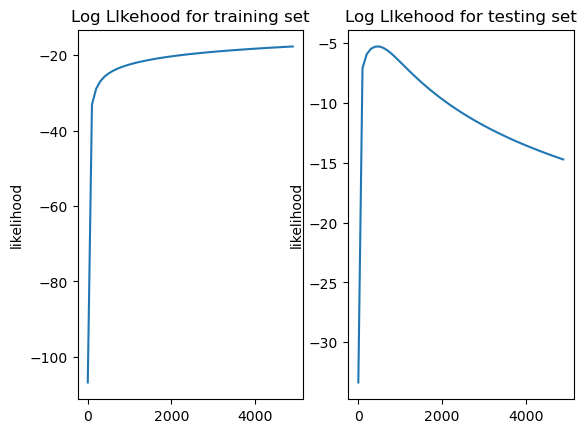

In [134]:
# Part B, Ex. 6
import matplotlib.pyplot as plt

def logLikeLihoodFn(X,y,theta):
    y = np.reshape(y,(len(y),1))
    return y.T.dot(np.log(sigmoidFn(theta.dot(X.T))))+(1-y).T.dot(np.log(1-sigmoidFn(theta.dot(X.T))))

def plotLogLk(X,y,tX, ty,itrs=5000,etaVal =0.5):

    xVals = []
    x2Vals = []
    y2Vals = []
    yVals =[]

    theta = np.zeros(X.shape[1])
    for itr in range(itrs):
        yPredic = sigmoidFn(X.dot(theta))
        grad = (1/X.shape[0])*etaVal*(X.T.dot(y-yPredic))
        theta += grad
        if(itr%100==0):
            xVals.append(itr)
            x2Vals.append(itr)
            y2Vals.append(logLikeLihoodFn(tX,ty,theta))
            yVals.append(logLikeLihoodFn(X,y,theta))
    
    fig, axis = plt.subplots(1,2)
    axis[0].plot(xVals,yVals)
    axis[0].set_ylabel("likelihood")
    axis[0].set_title("Log LIkehood for training set")
    axis[1].plot(x2Vals,y2Vals)
    axis[1].set_ylabel("likelihood")
    axis[1].set_title("Log LIkehood for testing set")
    # plt.figure(figsize=(50,750))
    plt.show()



plotLogLk(X2trainTransformed, trainy2Data, X2testTransformed, testy2Data)

Best Parameters:  {'t': 0.5, 'eta': 0.05, 'itrs': 5000}
Accuracy: 0.9912280701754386
Precision: 0.9850746268656716
Recall: 1.0
F1 score: 0.9924812030075187
Confusion matrix:
 [[47  1]
 [ 0 66]]


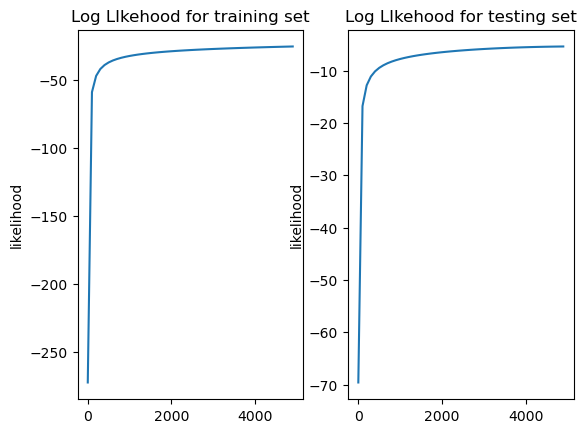

In [144]:
# Part B, Ex. 7


def searchForBetterParams(X,y,tX,ty):
    hyperparameters = [
    {'t': 0.5, 'eta': 0.5, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.6, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.7, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.8, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.9, 'itrs': 5000},
    {'t': 0.6, 'eta': 0.5, 'itrs': 5000},
    {'t': 0.6, 'eta': 0.6, 'itrs': 5000},
    {'t': 0.6, 'eta': 0.7, 'itrs': 5000},
    {'t': 0.6, 'eta': 0.8, 'itrs': 5000},
    {'t': 0.6, 'eta': 0.9, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.4, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.3, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.2, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.1, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.01, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.025, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.050, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.075, 'itrs': 5000},
    {'t': 0.5, 'eta': 0.5, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.6, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.7, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.8, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.9, 'itrs': 10000},
    {'t': 0.6, 'eta': 0.5, 'itrs': 10000},
    {'t': 0.6, 'eta': 0.6, 'itrs': 10000},
    {'t': 0.6, 'eta': 0.7, 'itrs': 10000},
    {'t': 0.6, 'eta': 0.8, 'itrs': 10000},
    {'t': 0.6, 'eta': 0.9, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.4, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.3, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.2, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.1, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.01, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.025, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.050, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.075, 'itrs': 10000},
    {'t': 0.5, 'eta': 0.5, 'itrs': 50000},
    {'t': 0.5, 'eta': 0.6, 'itrs': 50000},
    {'t': 0.5, 'eta': 0.7, 'itrs': 50000},
    {'t': 0.5, 'eta': 0.8, 'itrs': 50000},
    {'t': 0.5, 'eta': 0.9, 'itrs': 50000},
    {'t': 0.6, 'eta': 0.5, 'itrs': 50000},
    {'t': 0.6, 'eta': 0.6, 'itrs': 50000},
    {'t': 0.6, 'eta': 0.7, 'itrs': 50000},
    {'t': 0.6, 'eta': 0.8, 'itrs': 50000},
    {'t': 0.6, 'eta': 0.9, 'itrs': 50000},
    {'t': 0.5, 'eta': 0.4, 'itrs': 50000},
    {'t': 0.5, 'eta': 0.3, 'itrs': 50000},
    {'t': 0.5, 'eta': 0.2, 'itrs': 50000},
    {'t': 0.5, 'eta': 0.1, 'itrs': 50000},
    {'t': 0.5, 'eta': 0.01, 'itrs': 50000},
    {'t': 0.5, 'eta': 0.025, 'itrs': 50000},
    {'t': 0.5, 'eta': 0.050, 'itrs': 50000},
    {'t': 0.5, 'eta': 0.075, 'itrs': 50000},

]
    
    bestParam = hyperparameters[0]
    bestScore = 0
    X = np.c_[np.ones((X.shape[0],1)),X]
    tX = np.c_[np.ones((tX.shape[0],1)),tX]
    bestYp = None
    for hypParam in hyperparameters:
        theta = gradientAscent(X,y,hypParam['eta'],hypParam['itrs'])
        # make prediction 
        yP = (sigmoidFn(np.dot(tX, theta)) > hypParam['t']).astype(int)
        f1 = f1_score(ty,yP)
        if(f1>bestScore):
            bestScore = f1
            bestParam = hypParam
            bestYp = yP
    
    print("Best Parameters: ",bestParam)
    printStuff(ty,bestYp)
    plotLogLk(X, y, tX, ty,bestParam['itrs'],bestParam['eta'])
    return

searchForBetterParams(X2trainTransformed, trainy2Data, X2testTransformed, testy2Data)